# Analysis of Bank Customer Churn

Recently, the bank has experienced an increase in customer churn. Previously, churn analysis was conducted, dashboards were created, and segments were identified, but the customer base has since changed, rendering current solutions ineffective. The client for this analysis is the bank's marketing department, which needs to identify customer segments with the highest churn rates. The marketing department plans to send out targeted communications to customers in these identified segments. Since the mailing process is not automated and is done manually, the identified segments should ensure a highly targeted approach and not be too large.

**Research Objective:** Identify the reasons for customer churn in the bank and formulate recommendations for the marketing department to retain these customers.

**Research Tasks:**

- Assess the suitability of the initial data for further analysis and conduct data preprocessing.
- Analyze the presence of value/characteristic intervals that distinguish churned clients.
- Perform a correlation analysis of the data.
- Create profiles of customers who are likely and unlikely to leave the bank.
- Formulate and test hypotheses about statistically significant differences between the characteristics of churned and retained customers.
- Identify customer segments with churn rates higher than the bank's average based on the exploratory data analysis.
- Formulate recommendations for the marketing department to retain customers from the identified segments.

## Summary of the Analysis Results

Based on the analysis of the distribution of continuous and categorical features, the following churn intervals and criteria were identified (ranked in order of significance according to the `phik` correlation analysis method):

- Number of properties owned: 3 or more
- Customer activity: active during the evaluated time period
- Number of bank products used by the customer: 3 or more
- Credit score points: from 820 to 920 (peaking around 850-900 points)
- Gender: male
- Bank credit card: absent
- Age: from 25 to 35 years, from 50 to 60 years
- Estimated salary: from 85 to 230 thousand
- City of residence: Yaroslavl
- Account balance: over 750 thousand

The hypothesis testing showed that even relatively small differences, such as 1.5 years in age or about 7000 in salary, are statistically significant and can be considered when segmenting customers.

Three user groups were identified based on the segmentation results, and it is proposed that the marketing department should work with these groups to reduce the customer churn rate:

Segment 1 – Balance over 750k, no credit card, active – Recommendation: Offer a specialized travel credit card.

Segment 2 – Male clients, aged 50-60 years, using more than one bank product – Recommendation: Offer special conditions (cashback, discounts) on construction and gardening materials/tools and leisure products.

Segment 3 – Credit score of 850-900 points, residing in Yaroslavl, owning more than 3 properties – Recommendation: Offer a discount on insurance products when insuring more than one property object.

## Data Overview

Installing the `phik` library.

In [1]:
!pip install phik 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing the necessary libraries for data analysis:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import numpy as np
from phik import resources, report
from phik.report import plot_correlation_matrix
from scipy import stats as st
import json
from IPython.display import display, HTML

Reading the file `bank_scrooge.csv` with the data (the path to the data is stored in a JSON file) and saving it in the variable `data`:

In [3]:
# Чтение JSON файла
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)
 
# Чтение CSV файла с использованием пути из JSON
dataset_path_bank_analysis = config['dataset_path_bank_analysis']
data = pd.read_csv(dataset_path_bank_analysis)

Removing the restrictions on displaying the number of columns, rows, and column width.

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Displaying the first 5 rows and the main information about the dataframe `data` on the screen.

In [5]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


The original dataframe contains 10,000 rows with information about bank customers. However, data on age (`age`) and account balance (`balance`) is missing for some customers.

## Data Processing

Since the dataframe is planned to be used for in-depth data analysis, we will perform data preprocessing.

### Column name validation

To proceed, we'll convert the column names in the dataframe to lowercase and add underscores between words in the column names:

In [7]:
data.columns = ['user_id', 
                'score', 
                'city', 
                'gender', 
                'age', 
                'equity', 
                'balance', 
                'products', 
                'credit_card', 
                'last_activity', 
                'est_salary', 
                'churn']

In [8]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Checking for Duplicates and Handling Them

Let's check for explicit duplicates:

In [9]:
data.duplicated().sum()

0

Explicit duplicates are absent in the dataframe. To check for implicit duplicates, let's first write a function that outputs unique values for the columns passed to it. We will pass columns where values represent categories and may contain typos:

In [10]:
def print_unique_values(df, columns):
    for column in columns:
        if column in df.columns:
            unique_values = df[column].unique()
            print(f"Unique values for column '{column}':")
            print(unique_values)
            print()
        else:
            print(f"Column '{column}' not found in DataFrame.\n")

columns = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']
print_unique_values(data, columns)

Unique values for column 'city':
['Рыбинск' 'Ярославль' 'Ростов']

Unique values for column 'gender':
['Ж' 'М']

Unique values for column 'equity':
[1 5 0 4 3 2 6 7 8 9]

Unique values for column 'products':
[2 3 1 4 5 0]

Unique values for column 'credit_card':
[0 1]

Unique values for column 'last_activity':
[1 0]

Unique values for column 'churn':
[1 0]



Typos in the data for the columns listed above are absent; however, it is worth noting that some clients have 0 listed for the number of banking products they use. Let's display these clients:

In [11]:
data.loc[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


There is information about only one client in the dataframe who does not use any banking products. Since this client also does not have a credit card, has no recent activity, and is marked as churned, we can consider this row as an outlier and remove it from the dataframe.

In [12]:
data = data.loc[data['products'] != 0]

Translating the data in `city' and 'gender' columns into English:

In [13]:
translations = {
    'Рыбинск': 'Rybinsk',
    'Ярославль': 'Yaroslavl',
    'Ростов': 'Rostov'
}

data['city'] = data['city'].map(translations)

In [14]:
translations1 = {
    'М': 'M',
    'Ж': 'F'
}

data['gender'] = data['gender'].map(translations1)

Let's now check for duplicates among the user identification numbers.

In [15]:
data.duplicated(subset = ['user_id']).sum()

73

73 duplicates were found in the `user_id` column. Let's display them to identify any patterns:

In [16]:
# Assigning duplicates in the 'user_id' column to a variable
duplicates_mask = data.duplicated(subset=['user_id'], keep=False)

# Filtering duplicates and displaying them as a dataframe
duplicates_df = data[duplicates_mask]
duplicates_df = duplicates_df.sort_values(by=['user_id', 'city'])
duplicates_df.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Rybinsk,F,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Yaroslavl,F,38.0,0,NaN,1,0,1,119247.61,0
4866,117943,855.0,Rybinsk,F,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Yaroslavl,F,40.0,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Rybinsk,F,38.0,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Yaroslavl,M,30.0,0,NaN,1,1,1,146427.96,0
8638,123461,934.0,Rybinsk,M,34.0,0,NaN,2,1,0,291619.27,0
1411,123461,829.0,Yaroslavl,F,59.0,0,96222.44,2,0,1,102771.55,1
9775,124450,758.0,Rybinsk,F,36.0,0,73574.07,2,0,1,79963.59,0
8164,124450,859.0,Yaroslavl,F,38.0,6,516811.20,1,1,1,95144.63,1


Based on the analysis of the data above, it can be concluded that clients with identical `user_id` values are different individuals, as their credit scores, gender, age, and other metrics vary. The duplication of data in the `user_id` column occurs in two of the bank's branches – in the cities of Yaroslavl and Rybinsk. This information should be communicated to the client to prevent data duplication and related issues for the bank's operators/clients in the future.

### Data Coding

To analyze later the correlation between numerical and categorical unordered features, we will use `pandas.get_dummies()`:

In [17]:
# Creating copies of the original columns
data['gender_code'] = data['gender']
data['city_code'] = data['city']

# Performing encoding on the selected columns
data = pd.get_dummies(data, columns=['gender_code', 'city_code'])

# Renaming the new columns
data.rename(columns={'gender_code_F': 'gender_F', 
                     'gender_code_M': 'gender_M', 
                     'city_code_Rostov': 'Rostov',
                     'city_code_Rybinsk': 'Rybinsk',
                     'city_code_Yaroslavl': 'Yaroslavl'}, inplace=True)

# Displaying the first five rows of the dataframe for verification
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_F,gender_M,Rostov,Rybinsk,Yaroslavl
0,183012,850.0,Rybinsk,F,25.0,1,59214.82,2,0,1,75719.14,1,True,False,False,True,False
1,146556,861.0,Rybinsk,F,37.0,5,850594.33,3,1,0,86621.77,0,True,False,False,True,False
2,120722,892.0,Rybinsk,F,30.0,0,NaN,1,1,1,107683.34,0,True,False,False,True,False
3,225363,866.0,Yaroslavl,F,51.0,5,1524746.26,2,0,1,174423.53,1,True,False,False,False,True
4,157978,730.0,Yaroslavl,M,34.0,5,174.00,1,1,0,67353.16,1,False,True,False,False,True


### Analysis of Missing Values, Handling Missing Data

Upon reviewing the general information about the DataFrame, it was found that there are missing values in the columns `age` and `balance`. The number of missing values in the age column is less than 1% (26 out of 9999 records). We will display these missing values in a table:

In [18]:
age_missed = data.loc[data['age'].isna()]

age_missed_st = f'''
<div style="max-height:200px; overflow:auto;">
    {age_missed.to_html(index=False)}
</div>
'''

display(HTML(age_missed_st))

user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_F,gender_M,Rostov,Rybinsk,Yaroslavl
228075,932.0,Yaroslavl,M,NaN,5,7601719.20,2,1,1,408121.16,0,False,True,False,False,True
187635,692.0,Rybinsk,F,NaN,0,NaN,1,1,1,160368.82,0,True,False,False,True,False
221156,913.0,Yaroslavl,M,NaN,0,NaN,1,1,1,135693.24,0,False,True,False,False,True
138660,836.0,Rostov,F,NaN,5,294315.53,2,0,1,63310.22,1,True,False,True,False,False
210674,834.0,Rybinsk,M,NaN,1,238330.52,2,0,1,93775.06,0,False,True,False,True,False
218868,827.0,Rybinsk,F,NaN,4,448959.07,2,1,1,67835.95,0,True,False,False,True,False
151662,884.0,Rybinsk,F,NaN,0,NaN,1,1,1,137500.77,0,True,False,False,True,False
210135,908.0,Rybinsk,F,NaN,4,1120340.31,3,1,1,85002.15,0,True,False,False,True,False
219343,920.0,Rybinsk,F,NaN,0,NaN,1,1,0,159248.67,0,True,False,False,True,False
184913,829.0,Yaroslavl,F,NaN,3,188648.77,2,0,1,75206.90,0,True,False,False,False,True


In the displayed rows, no obvious pattern was found between the missing values in the `age` column and other data in the DataFrame. We will use the `corr()` method to check if there is any correlation between the missing values in the `age` column and other client characteristics:

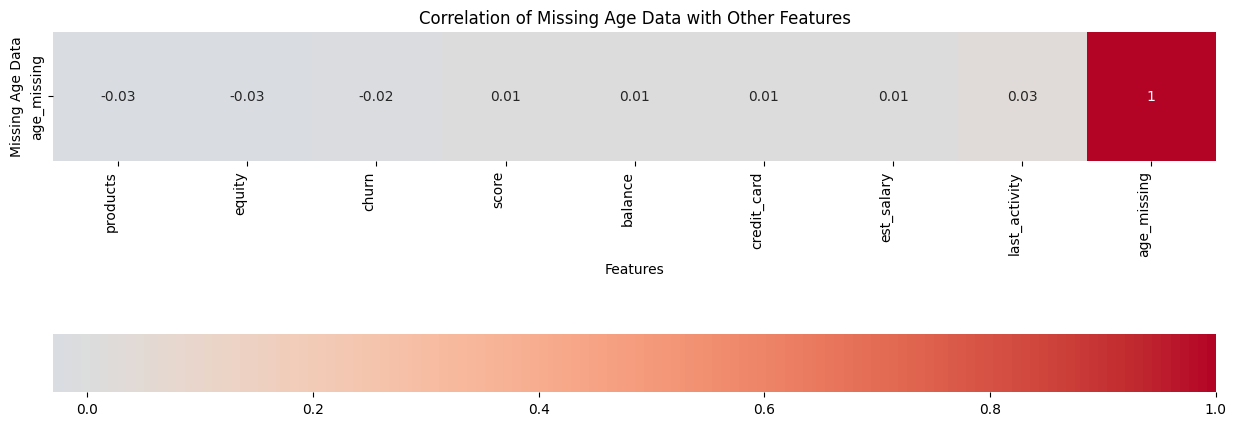

In [19]:
# Creating a column with boolean values indicating the presence or absence of missing values in the 'age' column
data['age_missing'] = data['age'].isnull().astype(int)

# Dropping the 'user_id' column as it does not provide useful information for correlation, 
# and also dropping the 'age' column
data_for_corr_a = data.drop(columns=['user_id', 'age'])

# Selecting only numerical columns
data_for_corr_a_numeric = data_for_corr_a.select_dtypes(include=[float, int])

# Computing the correlation matrix
correlation_matrix = data_for_corr_a_numeric.corr()

# Extracting the 'age_missing' row, sorting by correlation values, and transposing the table for easier viewing
age_missing_row = correlation_matrix.loc['age_missing'].sort_values(ascending=True).to_frame().T

# Rounding the values to two decimal places
age_missing_row = age_missing_row.round(2)

# Creating a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(age_missing_row, 
            square=True, 
            annot=True, 
            cmap='coolwarm', 
            cbar_kws={'orientation': 'horizontal'}, 
            center=0)

# Customizing the plot
plt.title('Correlation of Missing Age Data with Other Features')
plt.xlabel('Features')
plt.ylabel('Missing Age Data')
plt.xticks(rotation=90, ha='right')
plt.show()

According to the Chedoke scale, there is no even weak correlation between missing age data and other client characteristics. Thus, the correlation analysis did not reveal any dependence of client age on their other characteristics.

Let's display a histogram of the age distribution of clients:

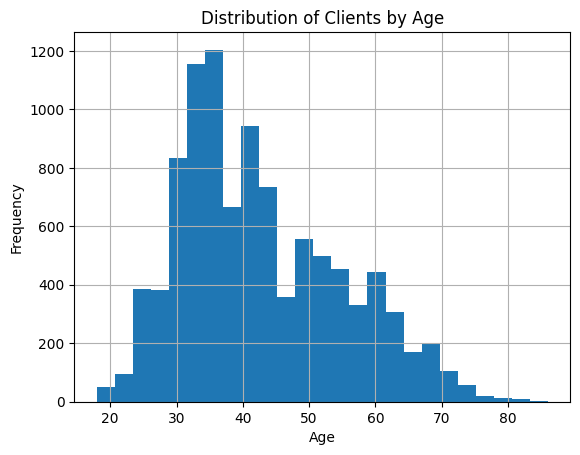

In [20]:
data['age'].hist(bins=25)
plt.title('Distribution of Clients by Age')
plt.xlabel('Age')
plt.ylabel('Frequency'); 

It can be concluded that these missing values fall into the `MCAR (Missing Completely at Random)` category. Since other data in the rows are present, to preserve them in the DataFrame, we will fill in the missing values with median values (to minimize the impact of outliers, as, for example, there are very few clients older than 75 years, whose data could significantly affect the average age).

In [21]:
data['age'] = data['age'].fillna(data['age'].median())

Now let's look at the missing values in the `balance` column. There are significantly more of them—about 23% (2249/9999).

In [22]:
balance_missed = data.loc[data['balance'].isna()]

balance_missed_st = f'''
<div style="max-height:200px; overflow:auto;">
    {balance_missed.to_html(index=False)}
</div>
'''

display(HTML(balance_missed_st))

user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_F,gender_M,Rostov,Rybinsk,Yaroslavl,age_missing
120722,892.0,Rybinsk,F,30.0,0,NaN,1,1,1,107683.34,0,True,False,False,True,False,0
133130,906.0,Yaroslavl,F,67.0,0,NaN,1,0,1,238055.53,0,True,False,False,False,True,0
148929,927.0,Rostov,M,52.0,0,NaN,1,1,1,196820.07,0,False,True,True,False,False,0
172184,921.0,Rostov,M,41.0,0,NaN,1,1,1,217469.48,0,False,True,True,False,False,0
127034,922.0,Rybinsk,F,53.0,0,NaN,1,0,0,147094.82,0,True,False,False,True,False,0
177415,896.0,Rybinsk,F,47.0,0,NaN,1,0,0,225060.35,0,True,False,False,True,False,0
155730,946.0,Yaroslavl,F,47.0,0,NaN,2,1,1,660015.85,0,True,False,False,False,True,0
205226,944.0,Yaroslavl,M,35.0,0,NaN,2,1,1,239843.39,0,False,True,False,False,True,0
173175,924.0,Rybinsk,F,51.0,0,NaN,1,1,1,248844.47,0,True,False,False,True,False,0
228585,956.0,Rostov,M,41.0,0,NaN,1,1,0,115117.10,0,False,True,True,False,False,0


We will also check if there are clients with a zero balance in the main DataFrame:

In [23]:
data.loc[data['balance'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_F,gender_M,Rostov,Rybinsk,Yaroslavl,age_missing
3900,179831,730.0,Yaroslavl,M,18.0,0,0.0,2,1,1,64548.33,0,False,True,False,False,True,0
6757,148456,813.0,Yaroslavl,M,20.0,2,0.0,2,1,0,23876.51,0,False,True,False,False,True,0


For the `balance` parameter, we will also display the correlation matrix of missing values with other client characteristics to identify any relationships:

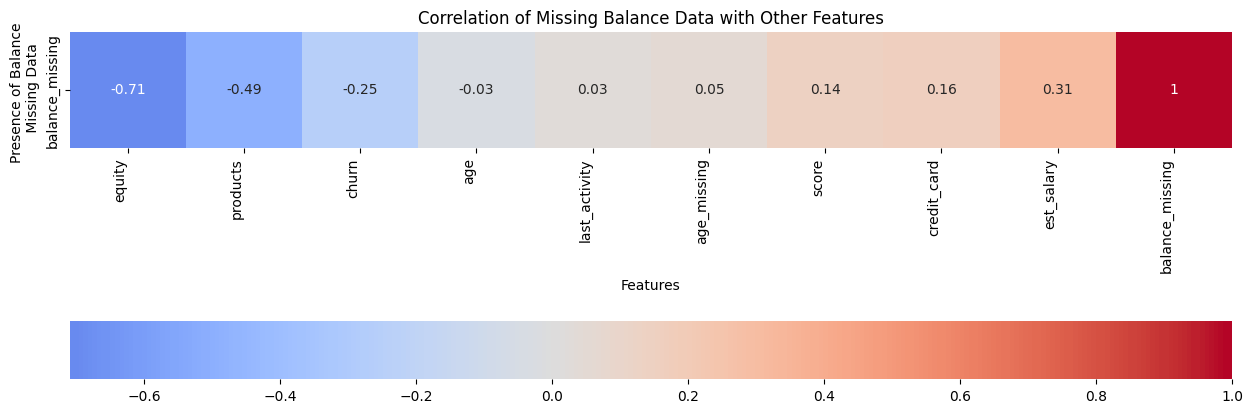

In [24]:
# Creating a column with boolean values indicating the presence or absence of missing values in the 'balance' column
data['balance_missing'] = data['balance'].isnull().astype(int)

# Dropping the 'user_id' column as it does not provide useful information for correlation, 
# and also dropping the 'balance' column
data_for_corr_b = data.drop(columns=['user_id', 'balance'])

# Selecting only numeric columns
data_for_corr_b_numeric = data_for_corr_b.select_dtypes(include=[float, int])

# Computing the correlation matrix
correlation_matrix_b = data_for_corr_b_numeric.corr()

# Extracting the 'balance_missing' row, sorting by correlation values, and transposing the table for better display
balance_missing_row = correlation_matrix_b.loc['balance_missing'].sort_values(ascending=True).to_frame().T

# Rounding values to two decimal places
balance_missing_row = balance_missing_row.round(2)

# Creating a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(balance_missing_row, 
            square=True, 
            annot=True, 
            cmap='coolwarm', 
            cbar_kws={'orientation': 'horizontal'}, 
            center=0)

# Customizing the plot
plt.title('Correlation of Missing Balance Data with Other Features')
plt.xlabel('Features')
plt.ylabel('Presence of Balance \n Missing Data')
plt.xticks(rotation=90, ha='right')
plt.show()

Among the clients for whom the balance data is missing, there are clients of all categories: both men and women, clients with high and low ratings, clients of various ages, from all three cities, using different numbers of products, both active and inactive, and both churned and non-churned. The only common factor is that none of them own more than one property, and most have zero property listed. However, most clients without balance data remain bank customers.

According to the results of the correlation analysis, the strongest (and negative) correlation for the balance feature is with the `equity` feature, with a correlation coefficient of -0.71. According to the Chedok scale, such a relationship is considered strong (ranging from 0.7 to 0.9).

Overall, the missing values in the balance column can be characterized as `MNAR (Missing Not at Random)` — the missingness depends on the data. However, without additional justification, it is not possible to impute these missing values based on the current data in the DataFrame. Additionally, we cannot assume that all clients without a specified balance have a zero balance (a zero balance is explicitly stated in the DataFrame). Since the volume of data with missing balance values is significant (23%), we will retain these missing values in the DataFrame.

### Data Type Consistency Check

Values in the columns `score` and `age` are integers but are currently of type `float`. We will convert the data types in these columns to match their content.

In [25]:
data['score'] = data['score'].astype(int)
data['age'] = data['age'].astype(int)

Based on the data preprocessing results, it can be concluded that the provided dataframe exhibits relative data completeness, with no explicit duplicates. It is worth noting that two of the bank's branches (Yaroslavl and Rybinsk) have duplicate customer identification numbers, which may complicate operators' work and lead to errors. As part of the data preprocessing, column names were standardized to lowercase and uniform formatting, and the data type was changed to `int` for columns containing integer values. Missing values in the `age` column (less than 1% of the data) were replaced with the median value, while missing values in the `balance` column (23%) were left unchanged, though a boolean column was added to indicate the presence or absence of balance data for clients. Additionally, categorical unordered data columns were encoded with boolean values for further use in correlation analysis.

## Data Analysis

First, let's reflect on the number of clients who have churned and those who have remained, both in percentage and absolute terms:

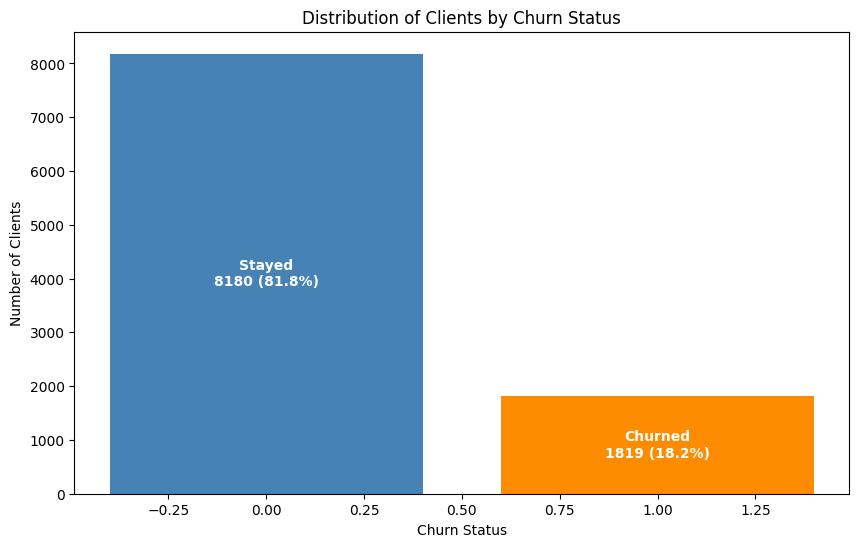

In [26]:
# Counting the number of each category in the 'churn' column
churn_counts = data['churn'].value_counts()

# Defining labels and values
labels = churn_counts.index
sizes = churn_counts.values

# Defining percentage values for labels
percentages = [f'{label} - {size}' for label, size in zip(labels, sizes)]

# Creating a figure for the bar chart
plt.figure(figsize=(10, 6))

# Creating the bar chart
bars = plt.bar(labels, sizes, color=['steelblue', 'darkorange'])

# Adding labels inside the bars
for bar, label in zip(bars, ['Stayed', 'Churned']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{label}\n{yval} ({yval / sum(sizes) * 100:.1f}%)', 
             ha='center', va='center', color='white', weight='bold')

# Adding title and axis labels
plt.title('Distribution of Clients by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Clients')

# Showing the plot
plt.show()

### Analysis of Distribution for Continuous Features

First, we will create histograms for the columns with continuous data — `score`, `age`, `balance`, and `est_salary`. The histograms will reflect the data by churn status (churned/stayed). Since the number of retained clients is more than four times greater than the number of churned clients, we will adjust for this difference in size in the histograms.

**Score**

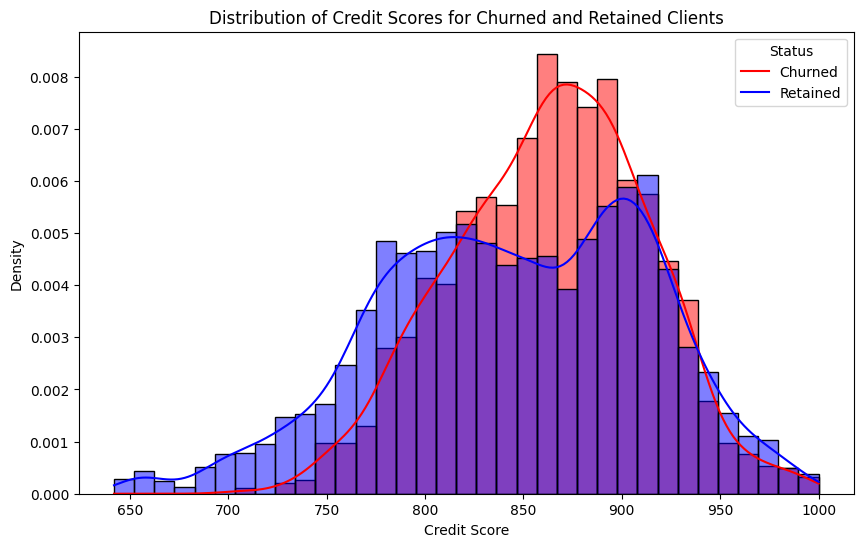

In [27]:
# Setting the size of the histogram
plt.figure(figsize=(10, 6))

# Creating a histogram with normalized densities for each group
sns.histplot(data=data, x='score', hue='churn', kde=True, 
             stat="density", common_norm=False, 
             palette={0: 'blue', 1: 'red'}, 
             alpha=0.5,
             bins=35)

# Adding title and axis labels
plt.title('Distribution of Credit Scores for Churned and Retained Clients')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend(title='Status', labels=['Churned', 'Retained'])

# Show the plot
plt.show()

According to the histogram, clients with credit scores below 820 are more likely to stay with the bank. **Clients with credit scores ranging from 820 to 920 are the most likely to churn**. It can be hypothesized that clients with relatively low scores may not feel financially secure enough to switch banks, while clients with scores above 920 have been with the bank for a long time and are satisfied with the terms. Clients with average scores, on the other hand, are somewhat confident in their financial situation and might seek better conditions at other banks, but they are not as loyal to the current bank because they receive fewer benefits compared to those with the highest scores.

**Age**

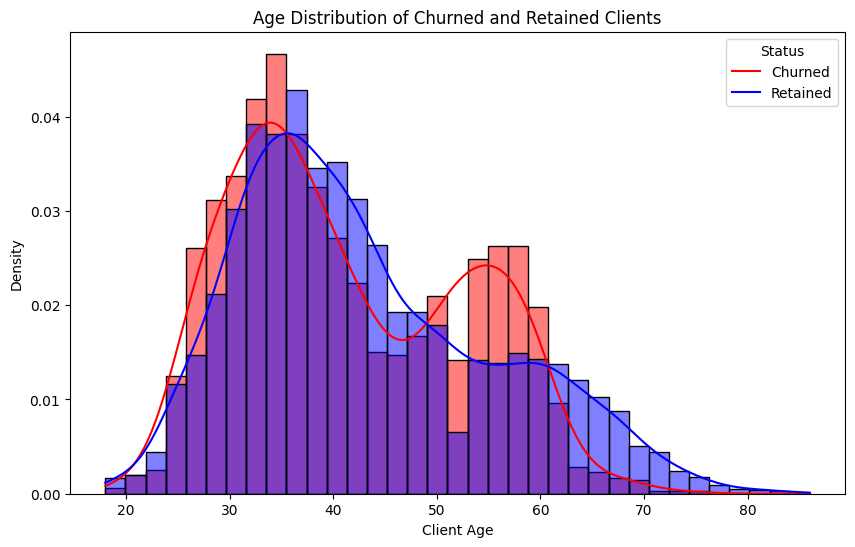

In [28]:
# Setting the size of the histogram
plt.figure(figsize=(10, 6))

# Plotting the histogram with normalized densities for each group
sns.histplot(data=data, x='age', hue='churn', kde=True, 
             stat="density", common_norm=False, 
             palette={0: 'blue', 1: 'red'}, 
             alpha=0.5, 
             bins=35)

# Adding title and axis labels
plt.title('Age Distribution of Churned and Retained Clients')
plt.xlabel('Client Age')
plt.ylabel('Density')
plt.legend(title='Status', labels=['Churned', 'Retained'])

# Show the plot
plt.show()

In this histogram, it should be noted that **clients aged 50 to 60 years are the most prone to churn**. Additionally, younger clients in the age range of 25 to 35 years (the largest group) are also more likely to churn. On the other hand, the proportion of churned clients decreases in the age ranges of 35 to 50 years and above 60 years. It can be inferred that the bank likely offers attractive options for retirees but may have fewer appealing offers for clients with significant accumulated capital, who are often in the 50-60 age range.

**Balance**

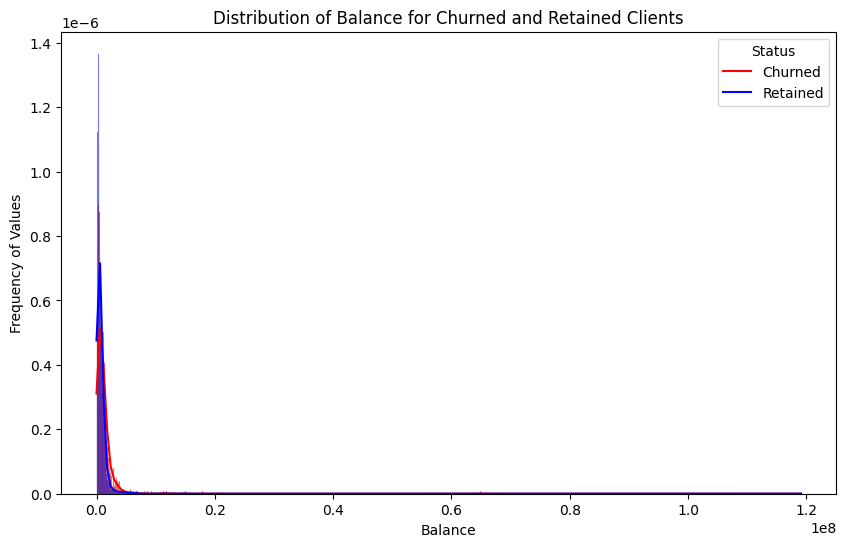

In [29]:
# Setting the size of the histogram
plt.figure(figsize=(10, 6))

# Creating a histogram with normalized densities for each group
sns.histplot(data=data, x='balance', hue='churn', kde=True, 
             stat="density", common_norm=False, 
             palette={0: 'blue', 1: 'red'}, 
             alpha=0.5)

# Adding title and axis labels
plt.title('Distribution of Balance for Churned and Retained Clients')
plt.xlabel('Balance')
plt.ylabel('Frequency of Values')
plt.legend(title='Status', labels=['Churned', 'Retained'])

# Showing the plot
plt.show()

In [30]:
# Calculating the percentage of data loss for clients with a given account balance
percentage = (data.loc[data['balance'] > 4000000]['balance'].count() / data['balance'].count()) * 100
percentage_rounded = round(percentage, 2)
print(f'Percentage of data loss: {percentage_rounded} %')

# Calculating the share of these data from the total account balance
balance_share = (data.loc[data['balance'] > 4000000]['balance'].sum() / data['balance'].sum()) * 100
balance_rounded = round(balance_share, 2)
print(f'Share of the total balance: {balance_rounded} %')

Percentage of data loss: 1.45 %
Share of the total balance: 16.53 %


When constructing the histogram, significant outliers were detected. The balance of 1.5% of clients with amounts exceeding 4 million represents almost 17% of the total balance, which could lead to significant influence from outliers in further analysis. Therefore, it was decided to discard the data for clients with balances over 4 million and rebuild the histogram.

In [31]:
data_filtered = data.loc[data['balance'] <= 4000000]

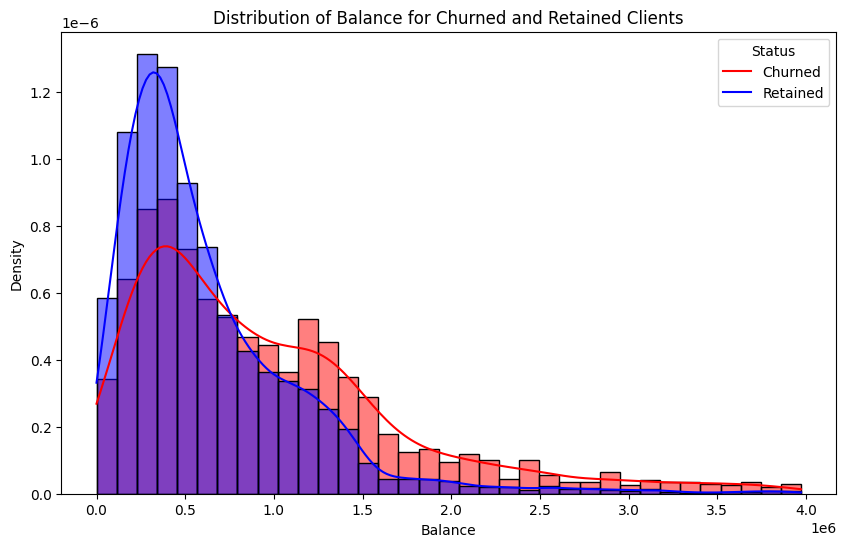

In [32]:
# Setting the size of the histogram
plt.figure(figsize=(10, 6))

# Plotting histogram with normalized densities for each group
sns.histplot(data=data_filtered, x='balance', hue='churn', kde=True, 
             stat="density", common_norm=False, 
             palette={0: 'blue', 1: 'red'}, 
             alpha=0.5, 
             bins=35)

# Adding title and axis labels
plt.title('Distribution of Balance for Churned and Retained Clients')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend(title='Status', labels=['Churned', 'Retained'])

# Displaying the plot
plt.show()

**Clients with a balance exceeding 750,000 have a higher tendency to churn** compared to other clients. Clients whose balance does not exceed the aforementioned amount are consistently more likely to show loyalty to their chosen bank.

**Est_salary (estimated salary)**

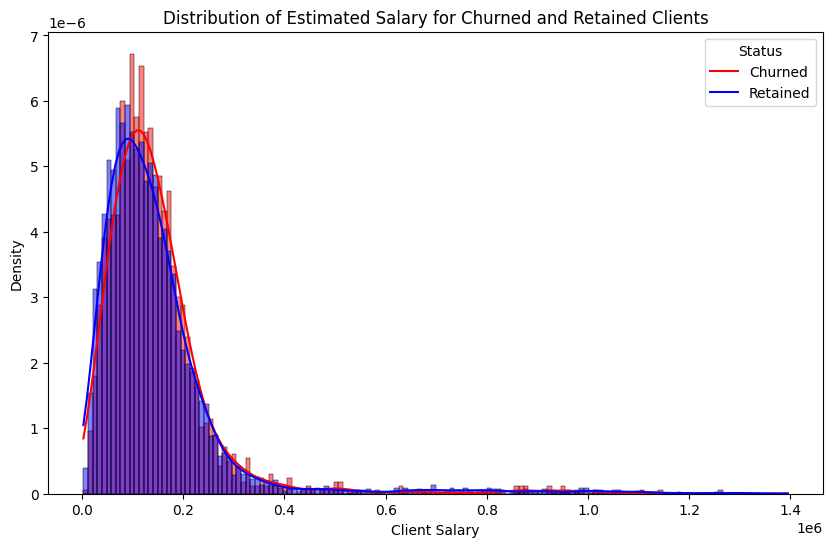

In [33]:
# Setting the size of the histogram
plt.figure(figsize=(10, 6))

# Plotting histogram with normalized densities for each group
sns.histplot(data=data, x='est_salary', hue='churn', kde=True, 
             stat="density", common_norm=False, 
             palette={0: 'blue', 1: 'red'}, 
             alpha=0.5)

# Adding title and axis labels
plt.title('Distribution of Estimated Salary for Churned and Retained Clients')
plt.xlabel('Client Salary')
plt.ylabel('Density')
plt.legend(title='Status', labels=['Churned', 'Retained'])

# Show the plot
plt.show()

In [34]:
# Calculating the percentage of data loss for a given salary value
percentage_salary = (data.loc[data['est_salary'] > 400000]['est_salary'].count() / data['est_salary'].count()) * 100
percentage_salary_rounded = round(percentage_salary, 2)
print(f'Data loss percentage: {percentage_salary_rounded} %')

# Calculating the share of these data from the total salary amount
salary_share = (data.loc[data['est_salary'] > 400000]['est_salary'].sum() / data['est_salary'].sum()) * 100
salary_share_rounded = round(salary_share, 2)
print(f'Share of total data: {salary_share_rounded} %')

Data loss percentage: 3.37 %
Share of total data: 17.11 %


In the salary distribution data, outliers are also observed. In the original dataset, just over 3% of clients earn more than 17% of the total salary amount. We will remove data for these clients by adding filtering conditions to the dataframe and then rebuild the histogram.

In [35]:
data_filtered = data.loc[data['est_salary'] <= 400000]

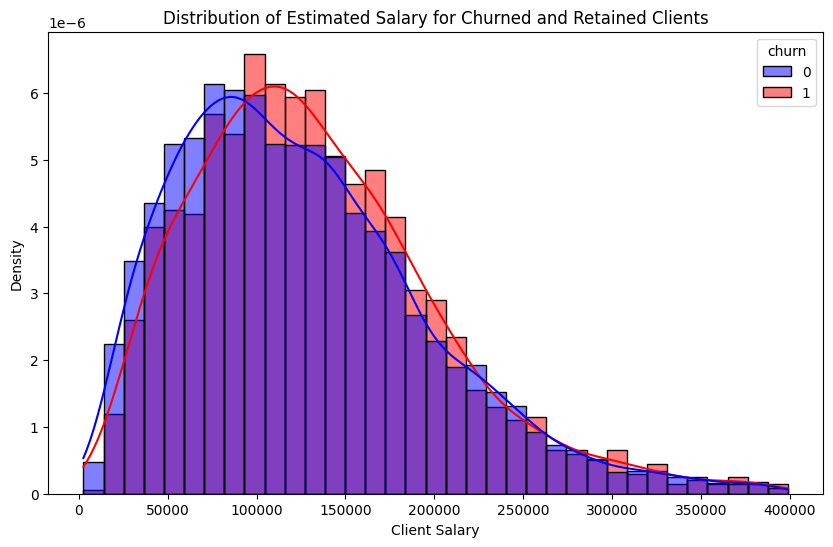

In [36]:
# Setting the size of the histogram
plt.figure(figsize=(10, 6))

# Plotting the histogram with normalized densities for each group
sns.histplot(data=data_filtered, x='est_salary', hue='churn', kde=True, 
             stat="density", common_norm=False, 
             palette={0: 'blue', 1: 'red'}, 
             alpha=0.5, 
             bins=35)

# Adding title and axis labels
plt.title('Distribution of Estimated Salary for Churned and Retained Clients')
plt.xlabel('Client Salary')
plt.ylabel('Density')

# Showing the plot
plt.show()

**Clients with a salary approximately between 85,000 and 230,000 are more likely to churn**. Clients who presumably earn less than this amount each month are generally more likely to remain loyal to their chosen bank, although it is worth noting that the difference in this indicator is not very significant.

### Analysis of Distribution for Categorical Features

Now, let's analyze the distribution for categorical features, which are represented in the columns `city`, `gender`, `equity`, `products`, `credit_card`, `last_activity`, and `balance_stated`.

**City (the branch location of the bank to which the client belongs)**

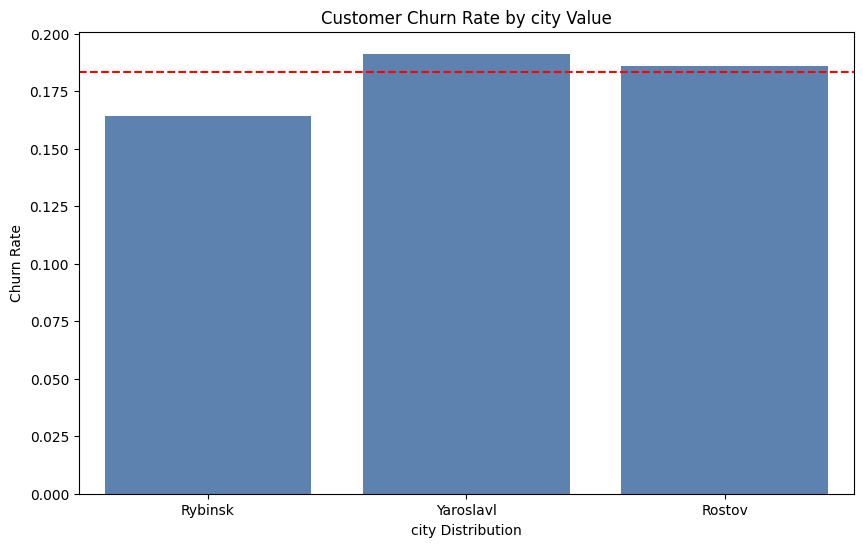

In [37]:
# Calculating the overall churn rate for the bank
overall_churn_rate = data_filtered['churn'].mean()

# Function to create a churn level bar chart
def plot_churn_by_feature(data, feature, overall_churn_rate):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='churn', data=data, color='#4f81bd', errorbar=None)
    plt.axhline(overall_churn_rate, color='red', linestyle='--')
    plt.title(f'Customer Churn Rate by {feature} Value')
    plt.xlabel(f'{feature} Distribution')
    plt.ylabel('Churn Rate')
    plt.show()

# Example function call for a specific column
plot_churn_by_feature(data_filtered, 'city', overall_churn_rate)

The customer churn rate in Yaroslavl is higher than the bank's average, in Rostov it is approximately equal to the average value, while in Rybinsk it is lower than the bank's average and the other two branches.

**Gender**

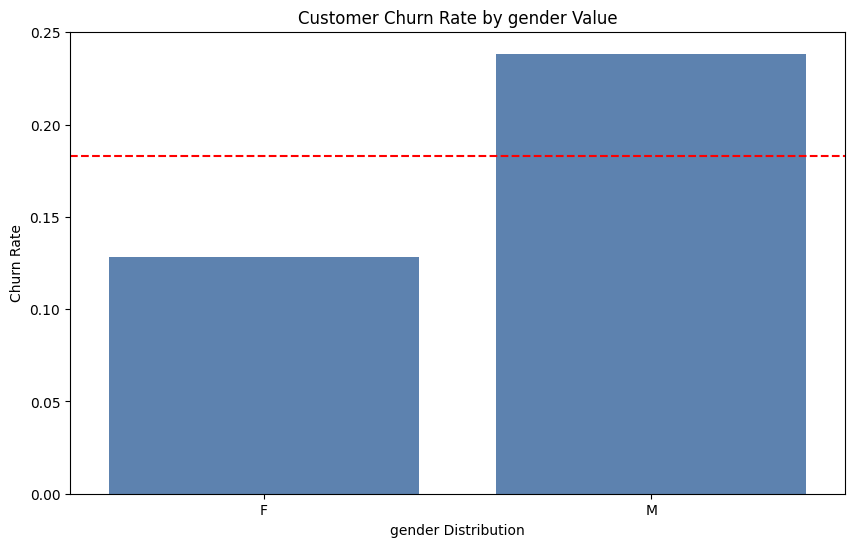

In [38]:
plot_churn_by_feature(data_filtered, 'gender', overall_churn_rate)

Male customers are significantly more prone to churn compared to female customers. The churn rate for men also significantly exceeds the bank's average rate.

**Equity**

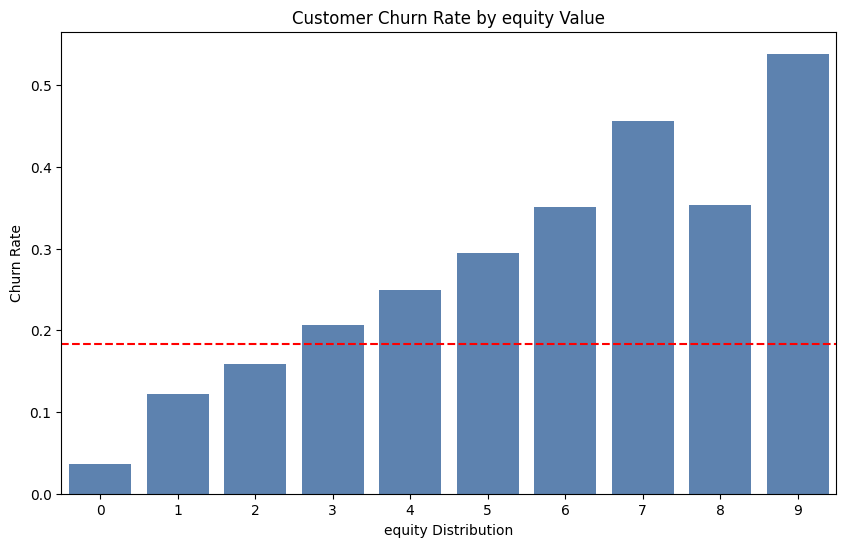

In [39]:
plot_churn_by_feature(data_filtered, 'equity', overall_churn_rate)

Customers who own three or more assets are more prone to churn compared to the bank's average. With the exception of one case, generally, the more assets a customer owns, the lower their loyalty to the bank.

**Products (the number of bank products used by the customer)**

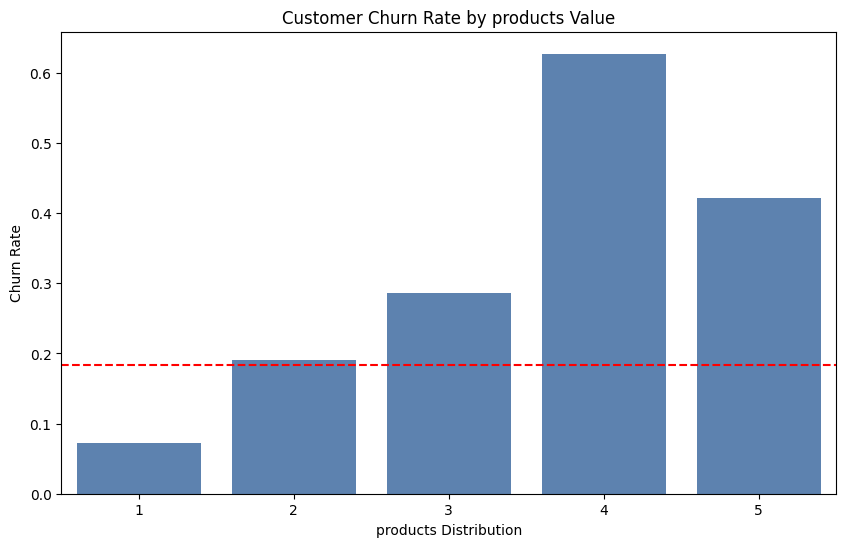

In [40]:
plot_churn_by_feature(data_filtered, 'products', overall_churn_rate)

The highest churn rate is observed among customers using 4 bank products. Additionally, the churn rate is above the bank's average for customers with 3 and 5 products, while customers with 2 products have a churn rate close to the average. It can be inferred that among customers with just one product, there is a significant proportion of salary account holders.

**Credit_card (whether the customer has a credit card: 1 - yes, 0 - no)**

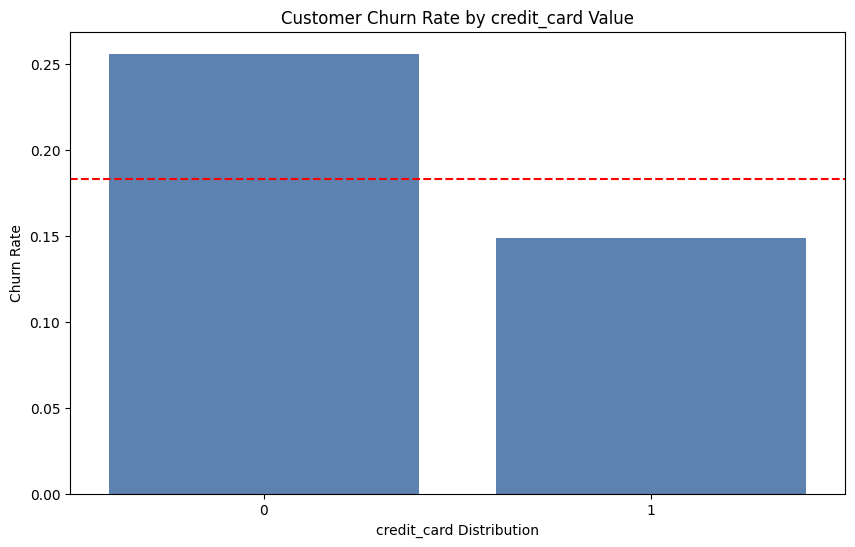

In [41]:
plot_churn_by_feature(data_filtered, 'credit_card', overall_churn_rate)

Customers without credit cards are more likely to churn compared to those who have them.

**Last_activity (customer activity over a fixed period: 1 - active, 0 - inactive)**

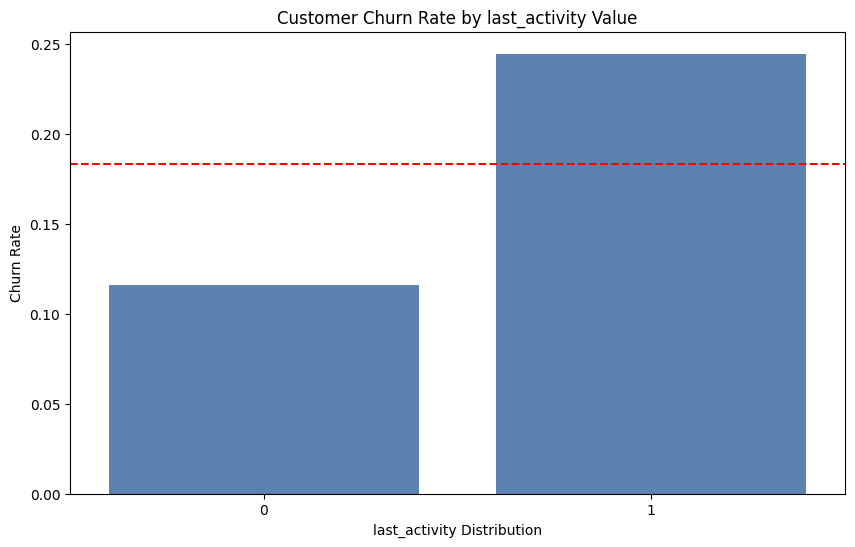

In [42]:
plot_churn_by_feature(data_filtered, 'last_activity', overall_churn_rate)

The churn rate among active customers is higher than the average, while it is lower among inactive customers. It can be assumed that among the inactive customers there are both those who have opened a banking product but do not use it and those who use long-term products, such as long-term deposits.

**Balance_missing (missing balance information for the client: 1 - balance data is missing, 0 - balance data is provided)**

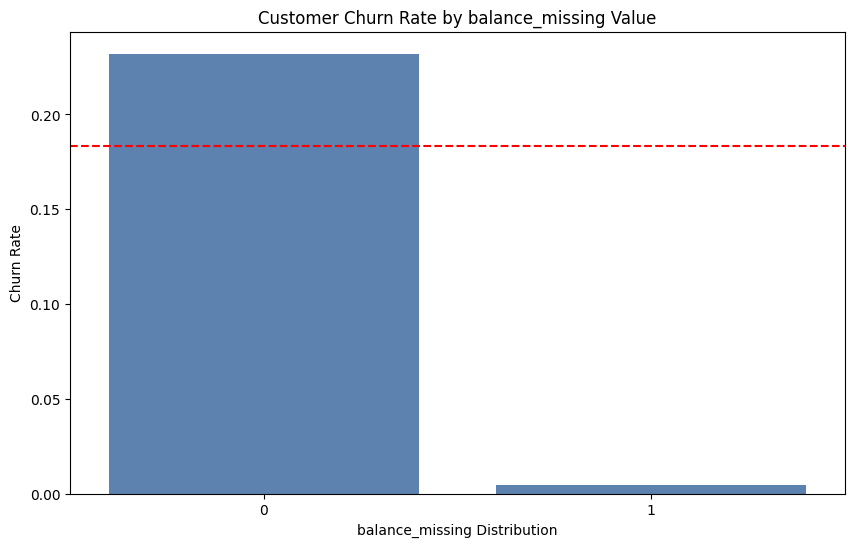

In [43]:
plot_churn_by_feature(data_filtered, 'balance_missing', overall_churn_rate)

Clients for whom balance data is missing are almost not prone to churn; the overwhelming majority of churned clients have their balance explicitly indicated in the dataframe.

### Correlation Analysis

Let's construct the correlation matrix of the other features with the churn feature using the `corr()` method.

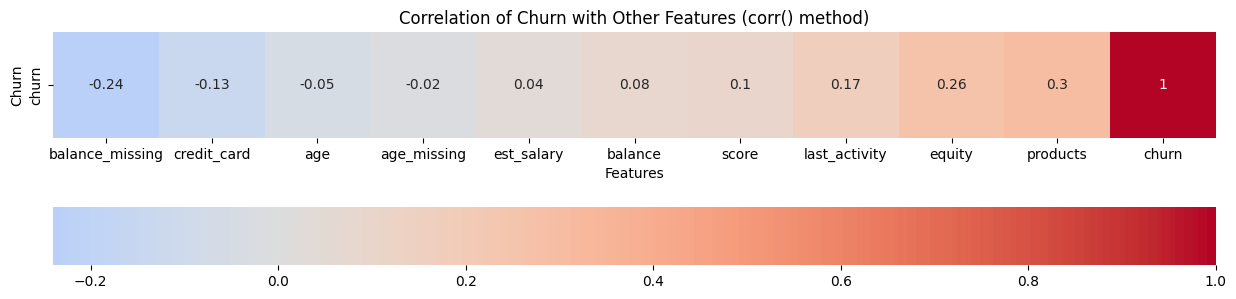

In [44]:
# Filtering only numerical columns, removing the 'user_id' column
numeric_data = data_filtered.drop(columns=['user_id']).select_dtypes(include=[float, int])

# Computing the correlation matrix
corr_m = numeric_data.corr()

# Extracting correlation of the 'churn' column with other columns
corr_churn = corr_m['churn']

# Sorting the correlation values in descending order
corr_churn = corr_churn.sort_values()

# Transposing the table for better display
corr_churn = corr_churn.to_frame().T

# Rounding the values to two decimal places
corr_churn = corr_churn.round(2)

# Creating a figure for the heatmap
plt.figure(figsize=(15, 6))

# Drawing the heatmap with a horizontal color bar
sns.heatmap(corr_churn, square=True, annot=True, cmap='coolwarm', cbar_kws={'orientation': 'horizontal'}, center=0)

# Setting up the plot
plt.title('Correlation of Churn with Other Features (corr() method)')
plt.xlabel('Features')
plt.ylabel('Churn')

# Showing the plot
plt.show()

Let's construct the correlation matrix of the other features with the churn feature using the `phik()` method.

In [45]:
# Calculating the 'phik' matrix
phik_overview = data_filtered.drop(columns=['user_id']).phik_matrix(interval_cols=['age', 
                                                                                   'score', 
                                                                                   'balance', 
                                                                                   'est_salary'])

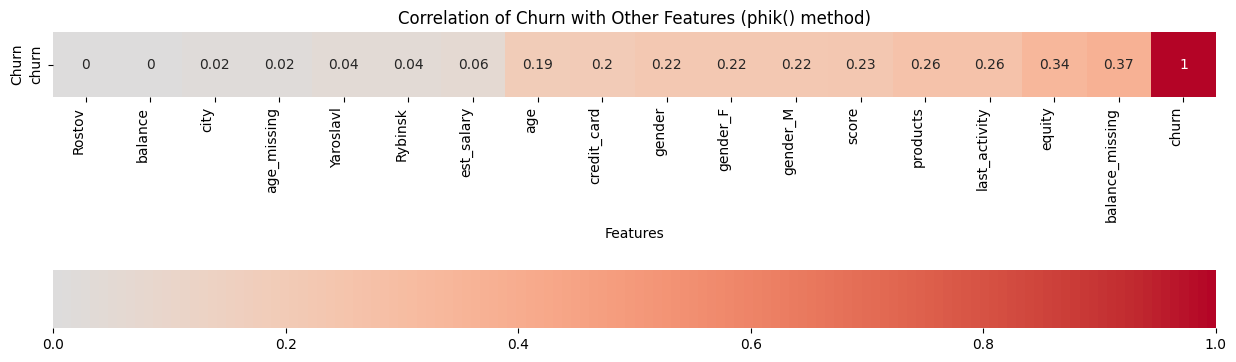

In [46]:
# Extracting the 'churn' row and sort by correlation values, transposing the table for better display
churn_row = phik_overview.loc['churn'].sort_values(ascending=True).to_frame().T

# Rounding the values to two decimal places
churn_row = churn_row.round(2)

# Creating a figure for the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(churn_row, square=True, annot=True, cmap='coolwarm', cbar_kws={'orientation': 'horizontal'}, center=0)

# Setting up the plot
plt.title('Correlation of Churn with Other Features (phik() method)')
plt.xlabel('Features')
plt.ylabel('Churn')
plt.xticks(rotation=90, ha='right')
plt.show()

The order of correlation between features differs between the two matrices, but common trends can be observed. The top four features influencing customer churn in both matrices are the presence of balance information (`balance_missing`, negative correlation), number of equity units (`equity`), customer activity (`last_activity`), and number of bank products used by the customer (`products`).

If we rely on the correlation matrix built using the `phik()` method, the quality of the correlation between individual parameters and customer churn can be characterized on the Cheddock scale as follows:

- No very high, high, or significant correlations are observed;
- Moderate correlation (0.3-0.5) with churn is found for `balance_missing` and `equity`;
- Weak correlation (0.1-0.3) with churn is found for `last_activity`, `products`, `score`, `gender`, `credit_card`, and `age`.

### Creating a Customer Profile in Terms of Churn

Let's create a customer profile in terms of churn and also calculate the relative difference between churned and non-churned customers.

In [47]:
# Segments for 'Churned Customers' and 'Non-Churned Customers'
churn_segment = data_filtered[data_filtered['churn'] == 1]
non_churn_segment = data_filtered[data_filtered['churn'] == 0]

# Function to calculate relative difference
def calculate_relative_difference(value_churn, value_non_churn):
    relative_difference = ((value_churn - value_non_churn) / value_non_churn * 100).round(2)
    return f'{relative_difference} %'

# Creating a DataFrame to collect results
results = pd.DataFrame(columns=['Churned Customers', 'Non-Churned Customers', 'Relative Difference'])

# Average credit score
mean_score_churn = (churn_segment['score'].mean()).round(2)
mean_score_non_churn = (non_churn_segment['score'].mean()).round(2)
relative_difference_score = calculate_relative_difference(mean_score_churn, mean_score_non_churn)
results.loc['Average Credit Score'] = [mean_score_churn, 
                                       mean_score_non_churn, 
                                       relative_difference_score]

# Average age
mean_age_churn = (churn_segment['age'].mean()).round(2)
mean_age_non_churn = (non_churn_segment['age'].mean()).round(2)
relative_difference_age = calculate_relative_difference(mean_age_churn, mean_age_non_churn)
results.loc['Average Age'] = [mean_age_churn, 
                              mean_age_non_churn, 
                              relative_difference_age]

# Average balance
mean_balance_churn = (churn_segment['balance'].mean()).round(2)
mean_balance_non_churn = (non_churn_segment['balance'].mean()).round(2)
relative_difference_balance_mean = calculate_relative_difference(mean_balance_churn, mean_balance_non_churn)
results.loc['Average Balance'] = [mean_balance_churn, 
                                   mean_balance_non_churn, 
                                   relative_difference_balance_mean]

# Median balance
median_balance_churn = (churn_segment['balance'].median()).round(2)
median_balance_non_churn = (non_churn_segment['balance'].median()).round(2)
relative_difference_balance_median = calculate_relative_difference(median_balance_churn, median_balance_non_churn)
results.loc['Median Balance'] = [median_balance_churn, 
                                  median_balance_non_churn, 
                                  relative_difference_balance_median]

# Average salary
mean_salary_churn = (churn_segment['est_salary'].mean()).round(2)
mean_salary_non_churn = (non_churn_segment['est_salary'].mean()).round(2)
relative_difference_salary_mean = calculate_relative_difference(mean_salary_churn, mean_salary_non_churn)
results.loc['Average Salary'] = [mean_salary_churn, 
                                  mean_salary_non_churn, 
                                  relative_difference_salary_mean]

# Median salary
median_salary_churn = (churn_segment['est_salary'].median()).round(2)
median_salary_non_churn = (non_churn_segment['est_salary'].median()).round(2)
relative_difference_salary_median = calculate_relative_difference(median_salary_churn, median_salary_non_churn)
results.loc['Median Salary'] = [median_salary_churn, 
                                  median_salary_non_churn, 
                                  relative_difference_salary_median]

# Median number of products
median_products_churn = churn_segment['products'].median()
median_products_non_churn = non_churn_segment['products'].median()
relative_difference_products = calculate_relative_difference(median_products_churn, median_products_non_churn)
results.loc['Median Number of Products'] = [median_products_churn, 
                                            median_products_non_churn, 
                                            relative_difference_products]

# Median number of equity
median_equity_churn = churn_segment['equity'].median()
median_equity_non_churn = non_churn_segment['equity'].median()
relative_difference_equity = calculate_relative_difference(median_equity_churn, median_equity_non_churn)
results.loc['Median Number of Equity'] = [median_equity_churn, 
                                          median_equity_non_churn, 
                                          relative_difference_equity]

# Mode of city
mode_city_churn = churn_segment['city'].mode()[0]
mode_city_non_churn = non_churn_segment['city'].mode()[0]
results.loc['Mode of City'] = [mode_city_churn, mode_city_non_churn, '']

# Mode of gender
mode_gender_churn = churn_segment['gender'].mode()[0]
mode_gender_non_churn = non_churn_segment['gender'].mode()[0]
results.loc['Mode of Gender'] = [mode_gender_churn, mode_gender_non_churn, '']

results

,Churned Customers,Non-Churned Customers,Relative Difference
Average Credit Score,861.61,844.45,2.03 %
Average Age,41.47,43.01,-3.58 %
Average Balance,1016808.57,673097.9,51.06 %
Median Balance,765946.34,470699.76,62.73 %
Average Salary,132410.31,125613.08,5.41 %
Median Salary,122451.5,115096.72,6.39 %
Median Number of Products,2.0,2.0,0.0 %
Median Number of Equity,4.0,3.0,33.33 %
Mode of City,Yaroslavl,Yaroslavl,
Mode of Gender,M,F,


Based on the resulting customer profile, it is evident that the largest gap between churned and non-churned customers is observed in parameters such as balance and amount of assets. It is also worth noting that men are more likely to leave the bank, while women are more likely to fall into the category of non-churned customers. One could say that the bank is not just facing an increase in customer churn: among the churned customers, the most affluent and reliable clients of the bank are predominant.

**Overall, based on the results of the exploratory data analysis**, it can be said that customer churn is most strongly influenced by parameters such as the amount of assets and the number of banking products the client has, as well as the client's activity.
Attrition predominantly occurs among individuals with high credit scores, in the age ranges of 35 to 50 and 50 to 60 years, with a balance exceeding 750,000 and a salary ranging from 85,000 to 230,000.

It is also worth noting that among those prone to attrition, the predominant characteristics are: men, customers whose bank branch is located in Yaroslavl, with three or more assets, using three or more banking products, not holding a credit card issued by the bank, and being active, meaning they have performed any transactions using banking products in the recent fixed period.

## Formulation and Testing of Statistical Hypotheses

We will test two hypotheses regarding the presence of statistically significant differences in the average salaries and average ages between customers who have left the bank and those who have stayed.

### Testing the Hypothesis of Equal Salaries (with Justification for the Choice of Statistical Test)

The average salary of customers who have left the bank is 132,410.31, while the average salary of customers who have stayed is 125,613.08. We will test the statistical significance of this difference.

Since the salary distributions of customers who have left and those who have stayed are independent of each other, and the sample sizes are sufficiently large (7,893 who have left and 1,769 who have stayed), we could consider using a t-test to test the hypothesis of equality of means between the two populations based on these samples. However, we must first check for significant outliers in the filtered data, as the t-test is sensitive to them.

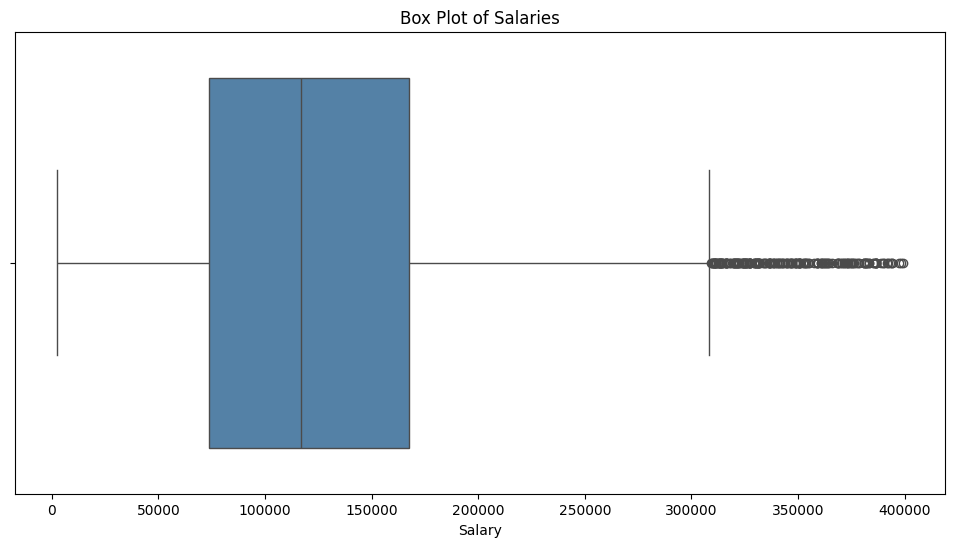

In [48]:
# Creating a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_filtered['est_salary'], color='steelblue')

# Plotting settings
plt.title('Box Plot of Salaries')
plt.xlabel('Salary')

# Showing the plot
plt.show()

Since the salary data still contains significant outliers, we will have to forgo the t-test in favor of the non-parametric Mann-Whitney U test (st.mannwhitneyu()).

**Null Hypothesis:** The average salaries of customers who have left the bank and those who have stayed are equal.

**Alternative Hypothesis:** The average salaries of customers who have left the bank and those who have stayed are not equal.

In [49]:
salary_churn = data_filtered.loc[data_filtered['churn'] == 1]['est_salary']
salary_non_churn = data_filtered.loc[data_filtered['churn'] == 0]['est_salary']

alpha = 0.05  # significance level
# If the p-value is less than this, we will reject the null hypothesis

results = st.mannwhitneyu(salary_churn, salary_non_churn)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis: the difference is statistically significant')
else:
    print('Failed to reject the null hypothesis: no conclusion about the difference can be made')

p-value:  9.371616928434134e-06
Reject the null hypothesis: the difference is statistically significant


Based on the results of the Mann-Whitney U test, we were able to reject the null hypothesis of equal average salaries between customers who have left the bank and those who have stayed. Therefore, there is a statistically significant difference between the average salaries of customers who have left and those who have stayed.

### Testing the Hypothesis of Equal Ages (with Justification for the Choice of Statistical Test)

The average age of customers who have left the bank is 41.5 years, while the average age of customers who have stayed is 43 years. We will test whether this age difference between the two types of clients is statistically significant.

Since the age distributions of customers who have left and those who have stayed are independent of each other, and the sample sizes are sufficiently large (7,893 who have left and 1,769 who have stayed), we need to first check for significant outliers in the filtered data, as the t-test is sensitive to them, to determine if a t-test is appropriate.

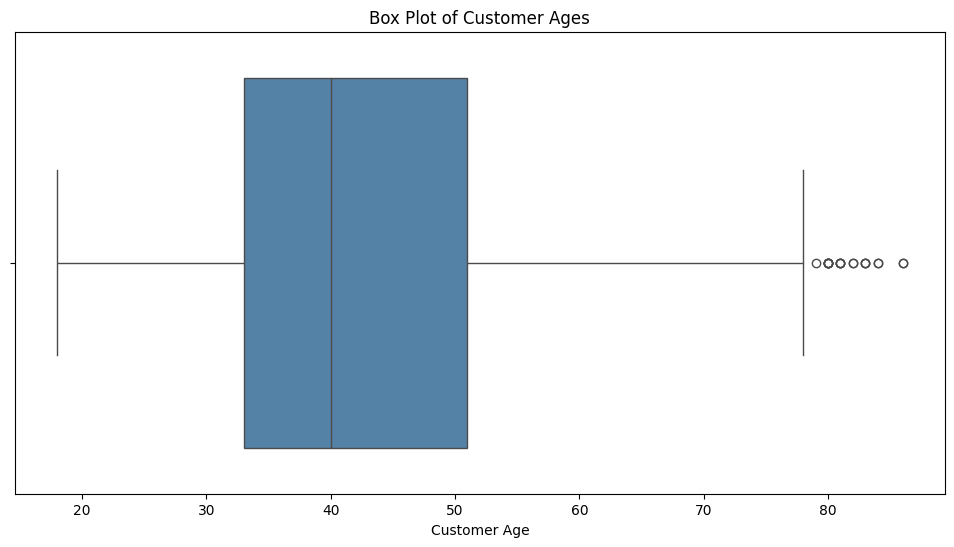

In [50]:
# Creating a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_filtered['age'], color='steelblue')

# Plotting settings
plt.title('Box Plot of Customer Ages')
plt.xlabel('Customer Age')

# Showing the plot
plt.show()

There are only a few outliers, so to filter them, we will limit the age data to the 95th percentile:

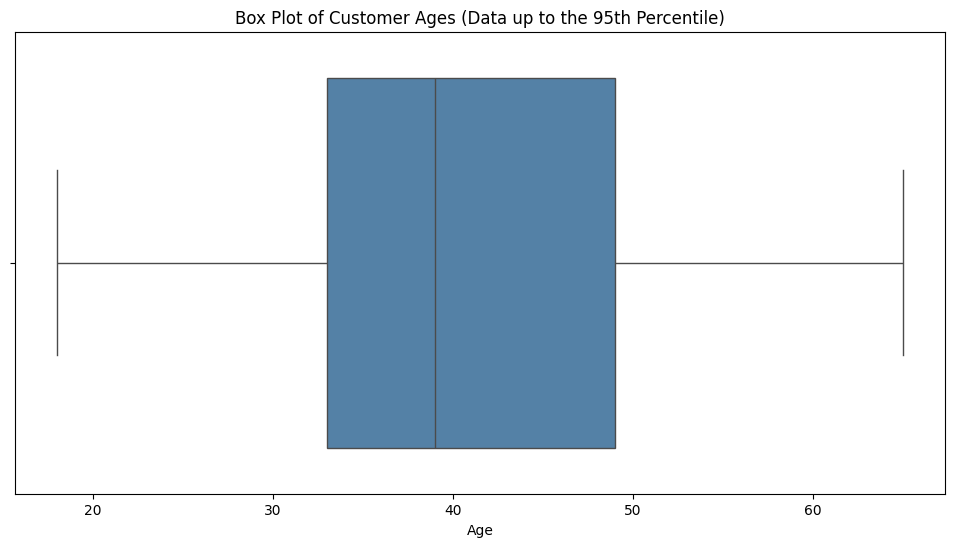

In [51]:
# Defining the upper threshold using the 95th percentile
age_threshold = np.percentile(data_filtered['age'], 95)

# Filtering the data, keeping only those within the 95th percentile
data_filtered = data_filtered[data_filtered['age'] <= age_threshold]

# Creating a vertical box plot with the filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_filtered['age'], color='steelblue')

# Plotting settings
plt.title('Box Plot of Customer Ages (Data up to the 95th Percentile)')
plt.xlabel('Age')

# Showing the plot
plt.show()

Now, we will apply the t-test to test the hypotheses. Since the sample sizes differ significantly (by more than a factor of 4), we will set the `equal_var` parameter to `False` so that the test calculates the variances of the samples separately.

**Null Hypothesis:** The ages of customers who have left the bank and those who have stayed are equal.

**Alternative Hypothesis:** The ages of customers who have left the bank and those who have stayed are not equal.

In [52]:
age_churn = data_filtered.loc[data_filtered['churn'] == 1]['age']
age_non_churn = data_filtered.loc[data_filtered['churn'] == 0]['age']

alpha = 0.05  # significance level
# If the p-value is less than this, we will reject the null hypothesis

results = st.ttest_ind(age_churn, age_non_churn, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis: the difference is statistically significant')
else:
    print('Failed to reject the null hypothesis: no conclusion about the difference can be made')

p-value: 0.7304786818230781
Failed to reject the null hypothesis: no conclusion about the difference can be made


Based on the results of the t-test, we were able to reject the null hypothesis of equal ages between customers who have left the bank and those who have stayed. Therefore, there is a statistically significant difference between the ages of customers who have left and those who have stayed.

**The hypothesis tests conducted showed** that even a difference of 6,800 in salary and 1.5 years in age between customers who have left the bank and those who have stayed is statistically significant within the analyzed dataframe.

## Summary of Preliminary Analysis

Based on the analysis of continuous and categorical feature distributions, correlation analysis, profiling of customers who have left and stayed, and hypothesis testing of the statistical significance of differences in various parameters, it can be concluded that for further segmentation of bank customers to identify groups most prone to churn, the following prioritized intervals and categories should be considered (in descending order of priority):

- Number of assets: 3 or more;
- Customer activity: active during the evaluated period;
- Number of banking products used by the customer: 3 or more;
- Credit score: from 820 to 920 (with a peak around 850-900 points);
- Gender: male;
- Bank credit card: absent;
- Age: from 25 to 35 years, from 50 to 60 years;
- Estimated salary: from 85,000 to 230,000;
- City of residence: Yaroslavl;
- Balance: over 750,000.

## Bank Client Segmentation

**Objective of Segmentation:** Identify segments within the bank's customer base where the number of clients exceeds 500 and the churn rate is higher than the bank's average (18%). This will allow for targeted recommendations to the marketing department for addressing these segments to reduce attrition.

In [53]:
# Defining customer segments and add their descriptions
segments = {
    "Segment 1": {
        "data": data_filtered.loc[(data_filtered['balance'] > 750000) & (data_filtered['credit_card'] == 0) &
        (data_filtered['last_activity'] == 1)],
        "description": "Balance > 750,000, no credit card, active customer"
    },
    "Segment 2": {
        "data": data_filtered.loc[((data_filtered['age'] >= 50) & (data_filtered['age'] <= 60)) &
        (data_filtered['gender'] == 'M') & (data_filtered['products'] > 1)],
        "description": 'Age 50-60, gender "M", more than 1 product'
    },
    "Segment 3": {
        "data": data_filtered.loc[((data_filtered['score'] >= 850) & (data_filtered['score'] <= 900)) &
        (data_filtered['city'] == 'Yaroslavl') & (data_filtered['equity'] >= 3)],
        "description": "Credit score 850-900, city Yaroslavl, 3 or more assets"
    }
}

# Preparing data for summary table
summary_data = []

for segment_name, segment_info in segments.items():
    segment_data = segment_info["data"]
    segment_description = segment_info["description"]
    segment_count = segment_data['user_id'].count()
    churn_rate = ((segment_data.loc[segment_data['churn'] == 1]['user_id'].count() / segment_count) * 100)\
                 .round(2) if segment_count > 0 else 0
    summary_data.append({
        'Segment': segment_name,
        'Conditions': segment_description,
        'Number of Customers': segment_count,
        'Churn Rate (%)': churn_rate
    })

# Creating summary table
summary_df = pd.DataFrame(summary_data)

# Sorting by churn rate
summary_df = summary_df.sort_values(by='Churn Rate (%)', ascending=False)

# Resetting index and starting new index from 1
summary_df = summary_df.reset_index(drop=True)
summary_df.index = summary_df.index + 1

summary_df

,Segment,Conditions,Number of Customers,Churn Rate (%)
1,Segment 1,"Balance > 750,000, no credit card, active customer",597,59.80
2,Segment 2,"Age 50-60, gender ""M"", more than 1 product",540,40.93
3,Segment 3,"Credit score 850-900, city Yaroslavl, 3 or more assets",980,40.20


Segments that group customers with higher-than-average attrition rates are arranged in order of prioritization (from highest to lowest churn rate). The number of customers in these segments ranges from 540 to 980, with churn rates from 40% to 60%, significantly exceeding the bank's average rate of 18%.

## Formulating Recommendations

**Segment 1** - Customers with a balance over 750,000, who are active and do not have a credit card: It can be assumed that these customers have sufficient funds to cover their daily needs. Therefore, it makes sense to offer them a credit card, which they could use to their benefit - а travel credit card with benefits from partner airlines (e.g., faster accumulation of miles), increased cashback on hotel bookings, and discounts on insurance products (such as those offered by the same bank) could be a valuable proposition.

**Segment 2** - Male customers aged 50 to 60 who use more than one product: The number of banking products used can serve as a filter, and for these customers, you might offer increased cashback on purchases related to home improvement and gardening, as men in this age group often have either a garden or a country house. Additionally, consider running a joint promotion with a major retail chain selling renovation and garden products, offering discounts to cardholders. Target the mailing specifically to male customers within this age range.

**Segment 3** - Customers with a high credit score between 850 and 900, residing in Yaroslavl, and owning 3 or more assets: Typically, assets include apartments and vehicles. It makes sense to use credit score and bank branch information as filters and offer these customers a discount on the bank's insurance products when insuring more than one item. This could appeal to customers who own multiple vehicles (for personal use or rental) and those with several apartments, especially if they rent out properties and need insurance coverage against unreliable tenants.

## Analysis Results

Overall, it can be said that the initial dataframe is sufficiently complete for a thorough analysis of the data it contains.

During preprocessing, the following adjustments were made: column names were corrected, missing values in the `age` column were filled with the median value, missing values in the `balance` column were encoded, integer data types were applied to columns containing whole numbers, and data encoding was performed for correlation analysis.

It is also worth noting that there is duplication of user identification numbers in the branches located in Yaroslavl and Rybinsk, which may complicate the work of operators and lead to errors in the future.

Based on the analysis of the distribution of continuous and categorical features, the following churn intervals and criteria were identified (ranked in descending order of significance according to the `phik()` correlation method):

- Number of assets: 3 or more;
- Customer activity: active during the evaluated period;
- Number of banking products used by the customer: 3 or more;
- Credit score: from 820 to 920 (with a peak around 850-900 points);
- Gender: male;
- Bank credit card: absent;
- Age: from 25 to 35 years, from 50 to 60 years;
- Estimated salary: from 85,000 to 230,000;
- City of residence: Yaroslavl;
- Balance: over 750,000.
  
Hypothesis testing revealed that even relatively small differences, such as 1.5 years in age or approximately 7,000 in salary, are statistically significant and should be considered in customer segmentation.

The segmentation results identified three user groups that the marketing department should focus on to reduce customer attrition:

Segment 1 – Balance over 750,000, no credit card, active: Recommendation – Offer a specialized travel credit card.

Segment 2 – Male customers aged 50-60, using more than 1 banking product: Recommendation – Offer special conditions (cashback, discounts) on home improvement and gardening products.

Segment 3 – Credit score 850-900, residing in Yaroslavl, owning more than 3 assets: Recommendation – Offer a discount on insurance products when insuring more than one asset.